In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta.xlsx")

In [3]:
data.head(5)

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Belum Diketahui (masih verifikasi),Menunggu Hasil,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-03,NaN,2020-03-03 18:00:00,3,0,1,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-04,NaN,2020-03-04 18:00:00,3,0,1,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-05,NaN,2020-03-05 18:00:00,7,0,3,0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             503 non-null    datetime64[ns]
 1   Jam                                 484 non-null    float64       
 2   Tanggal Jam                         503 non-null    datetime64[ns]
 3   Total Pasien                        503 non-null    int64         
 4   Sembuh                              503 non-null    int64         
 5   Meninggal                           503 non-null    int64         
 6   Self Isolation                      503 non-null    int64         
 7   Masih Perawatan                     503 non-null    int64         
 8   Belum Diketahui (masih verifikasi)  0 non-null      float64       
 9   Menunggu Hasil                      6 non-null      float64       
 10  Tenaga Kesehatan Terinfeks

In [6]:
data= data.drop(columns=["Unnamed: 18",
                   "Unnamed: 19",
                   "Unnamed: 20",
                   "Unnamed: 21",
                   "Unnamed: 22",
                   "Unnamed: 23",
                   "Unnamed: 24",
                   "Unnamed: 25",
                   "Unnamed: 26",
                   "Unnamed: 27",
                   'Unnamed: 28'])

In [7]:
data.head(5)

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Belum Diketahui (masih verifikasi),Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data,Meniggal harian
0,2020-03-01,NaN,2020-03-01 18:00:00,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0
1,2020-03-02,NaN,2020-03-02 18:00:00,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0
2,2020-03-03,NaN,2020-03-03 18:00:00,3,0,1,0,2,NaN,NaN,NaN,3,2,0,NaN,NaN,NaN,1
3,2020-03-04,NaN,2020-03-04 18:00:00,3,0,1,0,2,NaN,NaN,NaN,0,2,0,NaN,NaN,NaN,0
4,2020-03-05,NaN,2020-03-05 18:00:00,7,0,3,0,4,NaN,NaN,NaN,4,4,0,NaN,NaN,NaN,2


<b> Asumsi bahwa NaN adalah 0 untuk dibagian angka</b>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             503 non-null    datetime64[ns]
 1   Jam                                 484 non-null    float64       
 2   Tanggal Jam                         503 non-null    datetime64[ns]
 3   Total Pasien                        503 non-null    int64         
 4   Sembuh                              503 non-null    int64         
 5   Meninggal                           503 non-null    int64         
 6   Self Isolation                      503 non-null    int64         
 7   Masih Perawatan                     503 non-null    int64         
 8   Belum Diketahui (masih verifikasi)  0 non-null      float64       
 9   Menunggu Hasil                      6 non-null      float64       
 10  Tenaga Kesehatan Terinfeks

- Karena Kolum "Belum Diketahui (masih verifikasi)" tidak ada data sama sekali, maka akan didrop
- karena kolum "Tanggal" dan "Jam" telah diwakilkan oleh "Tanggal Jam", kedua kolum tersebut akan didrop

In [9]:
data = data.drop(columns=["Belum Diketahui (masih verifikasi)",
                          "Jam",
                          "Tanggal Jam"])

In [10]:
data["Positif Harian"].describe()

count      503.000000
mean      1445.359841
std       2245.317226
min          0.000000
25%        219.000000
50%        890.000000
75%       1447.500000
max      14619.000000
Name: Positif Harian, dtype: float64

<b> untuk soal nomor 1 dan 2</b> diatas adalah jawabannya

In [11]:
data["Positif Harian"].value_counts()

0       7
127     4
76      3
98      3
867     2
       ..
278     1
275     1
1298    1
3340    1
1566    1
Name: Positif Harian, Length: 437, dtype: int64

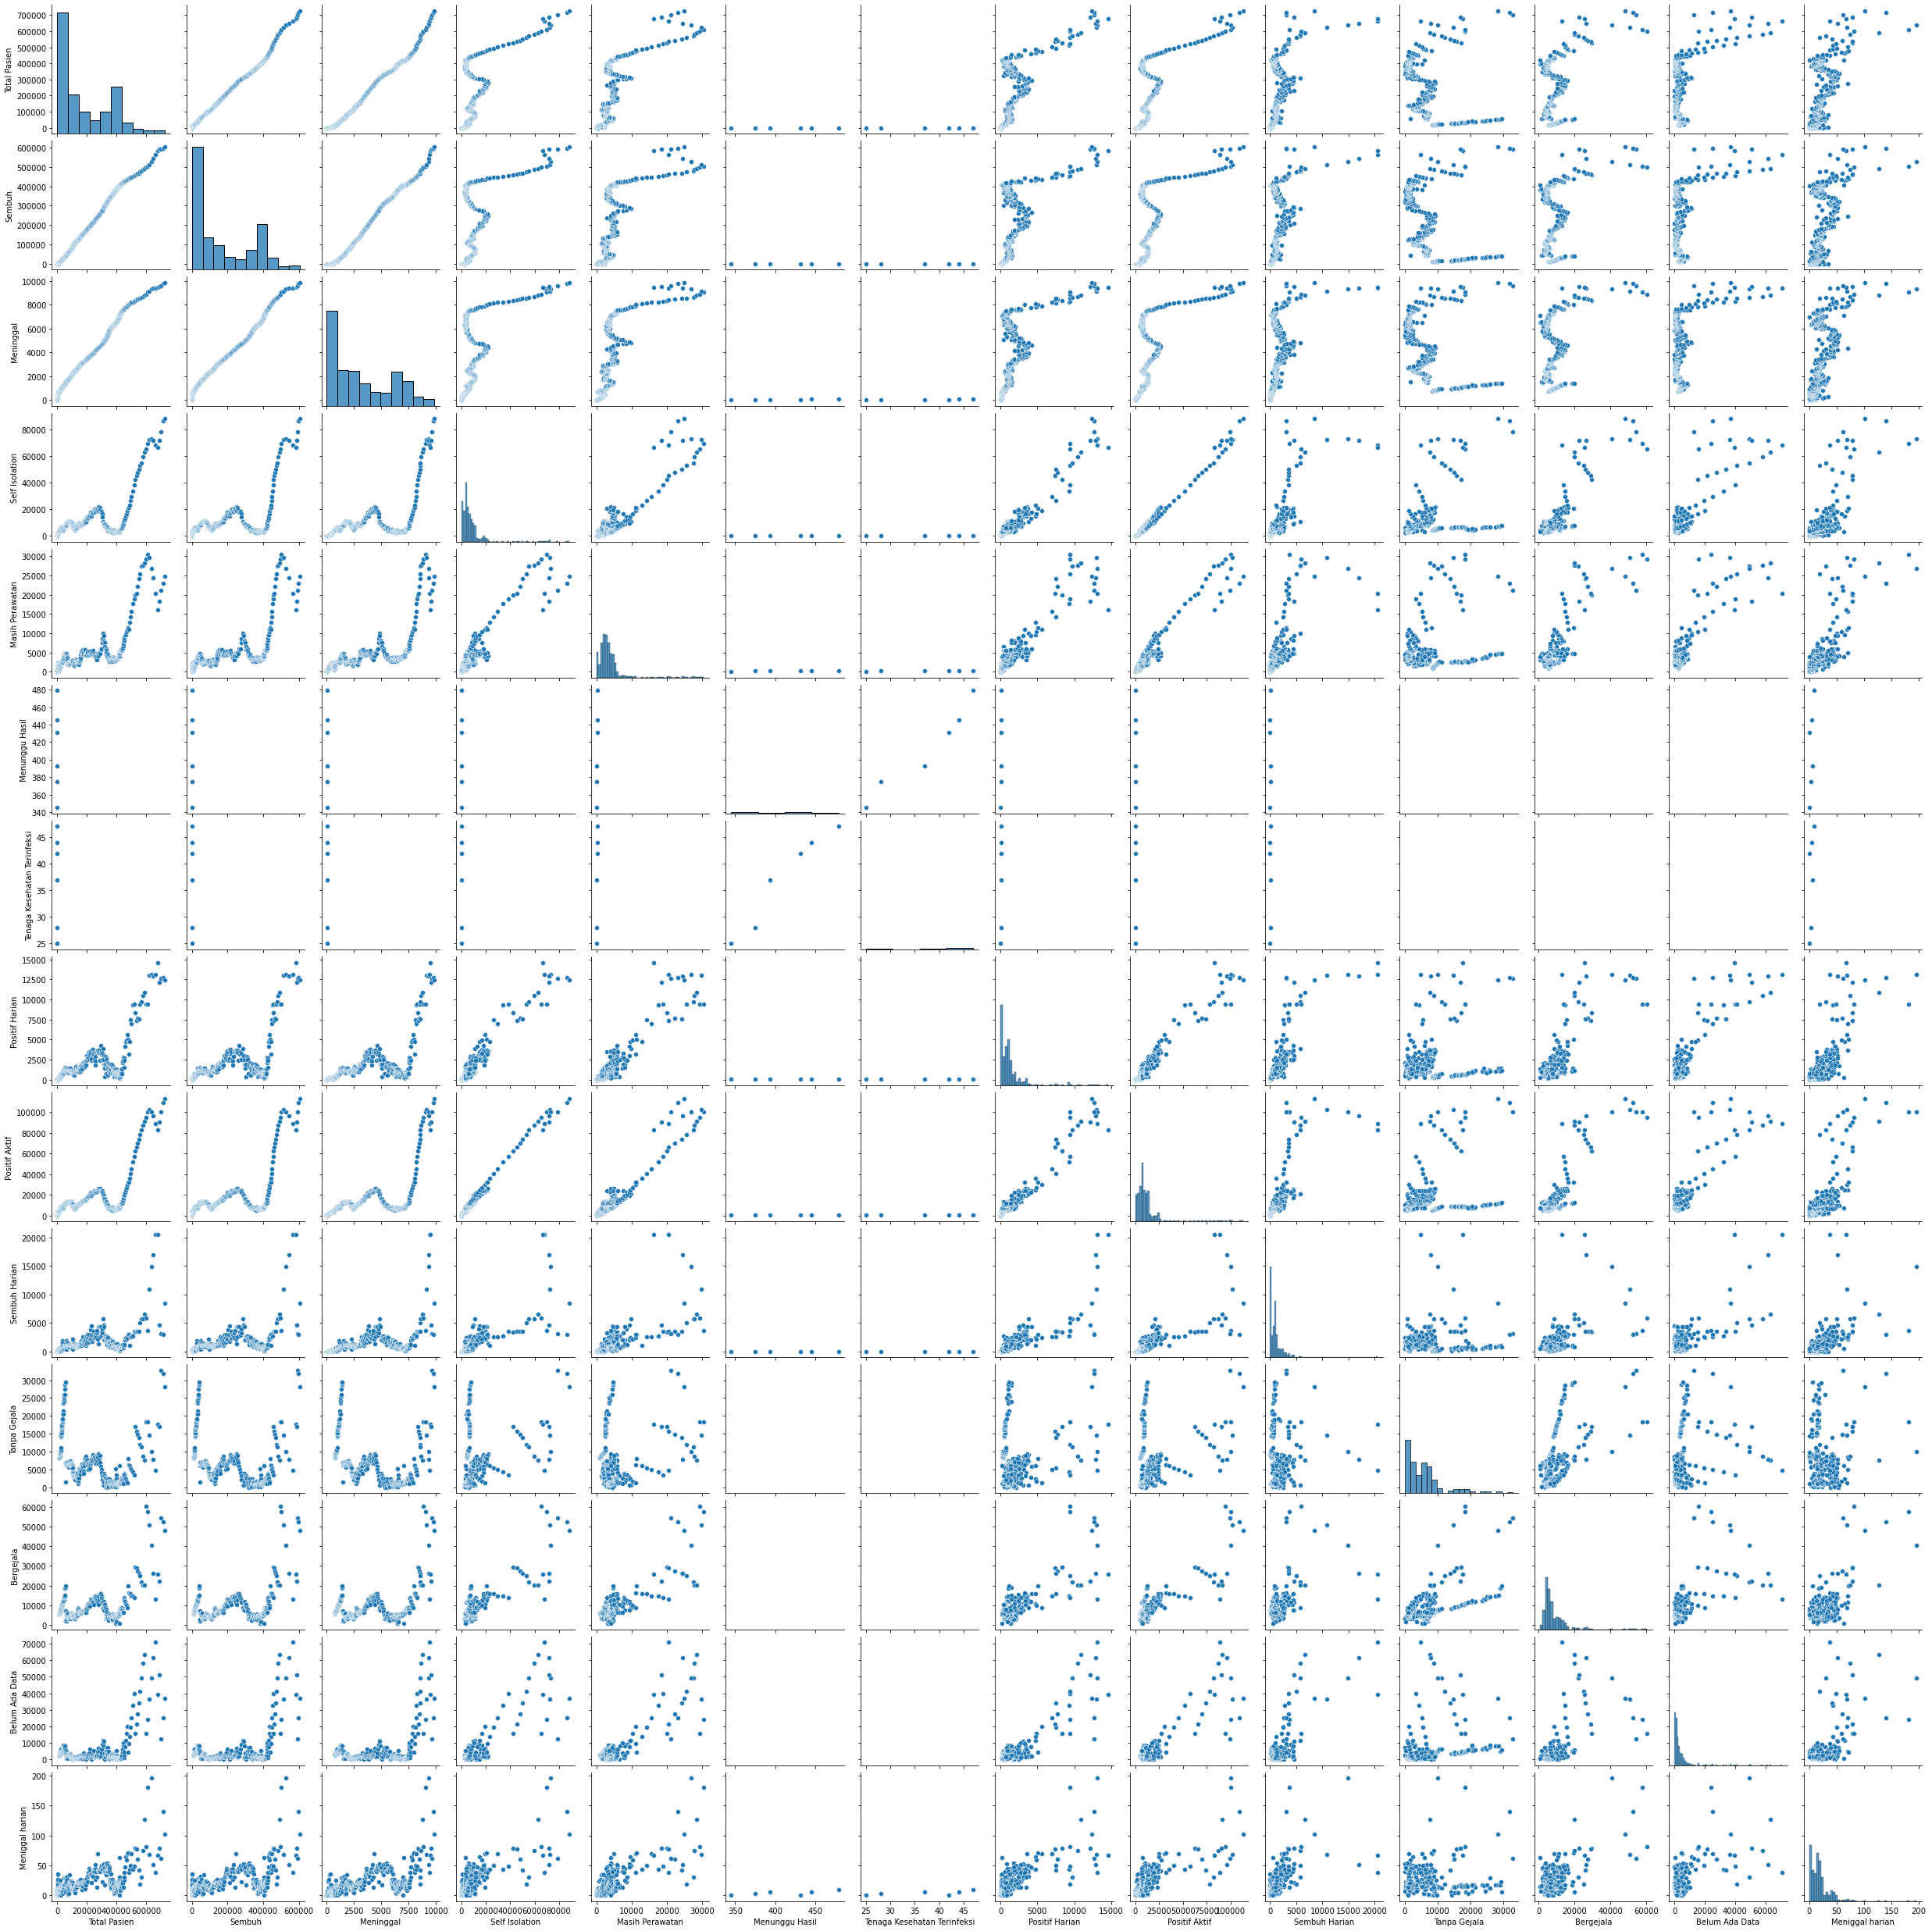

In [12]:
sns.pairplot(data)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Tanggal                      503 non-null    datetime64[ns]
 1   Total Pasien                 503 non-null    int64         
 2   Sembuh                       503 non-null    int64         
 3   Meninggal                    503 non-null    int64         
 4   Self Isolation               503 non-null    int64         
 5   Masih Perawatan              503 non-null    int64         
 6   Menunggu Hasil               6 non-null      float64       
 7   Tenaga Kesehatan Terinfeksi  6 non-null      float64       
 8   Positif Harian               503 non-null    int64         
 9   Positif Aktif                503 non-null    int64         
 10  Sembuh Harian                503 non-null    int64         
 11  Tanpa Gejala                 363 non-null    

In [14]:
data["Tanggal"]

0     2020-03-01
1     2020-03-02
2     2020-03-03
3     2020-03-04
4     2020-03-05
         ...    
498   2021-07-12
499   2021-07-13
500   2021-07-14
501   2021-07-15
502   2021-07-16
Name: Tanggal, Length: 503, dtype: datetime64[ns]

In [15]:
tempt = 1

for i in range(503):
    data["Tanggal"][i] = tempt
    tempt = tempt +1

<ipython-input-15-3396a00e9ad9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tanggal"][i] = tempt


In [16]:
 data["Tanggal"]

0        1
1        2
2        3
3        4
4        5
      ... 
498    499
499    500
500    501
501    502
502    503
Name: Tanggal, Length: 503, dtype: object

In [17]:
data["Tanpa Gejala"].describe()

count      363.000000
mean      6415.278237
std       6415.994815
min         75.000000
25%       1678.500000
50%       5016.000000
75%       7732.500000
max      32752.000000
Name: Tanpa Gejala, dtype: float64

<AxesSubplot:xlabel='Positif Aktif'>

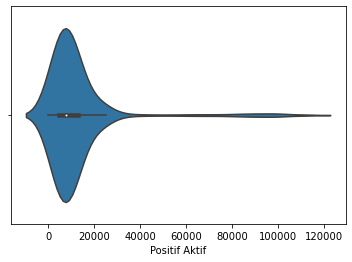

In [18]:
sns.violinplot(x=data["Positif Aktif"])

<AxesSubplot:xlabel='Tanpa Gejala'>

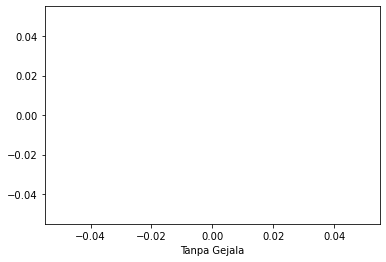

In [19]:
sns.scatterplot(x=data["Tanpa Gejala"])

In [20]:
data["Tanpa Gejala"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
498    17649.0
499    16957.0
500    32752.0
501    31922.0
502    28216.0
Name: Tanpa Gejala, Length: 503, dtype: float64

In [21]:
data["Positif Aktif"].describe()

count       503.000000
mean      12394.954274
std       16912.614188
min           0.000000
25%        4512.000000
50%        7816.000000
75%       12931.000000
max      113137.000000
Name: Positif Aktif, dtype: float64

In [22]:
data["Masih Perawatan"].describe()

count      503.000000
mean      3970.773360
std       4675.787035
min          0.000000
25%       1872.000000
50%       2861.000000
75%       4407.000000
max      30418.000000
Name: Masih Perawatan, dtype: float64

C:\Users\muham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Masih Perawatan'>

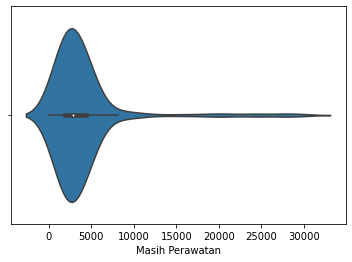

In [23]:
sns.violinplot(data["Masih Perawatan"])

In [24]:
data["Positif Harian"].describe()

count      503.000000
mean      1445.359841
std       2245.317226
min          0.000000
25%        219.000000
50%        890.000000
75%       1447.500000
max      14619.000000
Name: Positif Harian, dtype: float64

C:\Users\muham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positif Harian'>

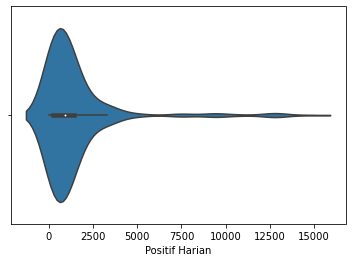

In [25]:
sns.violinplot(data["Positif Harian"])

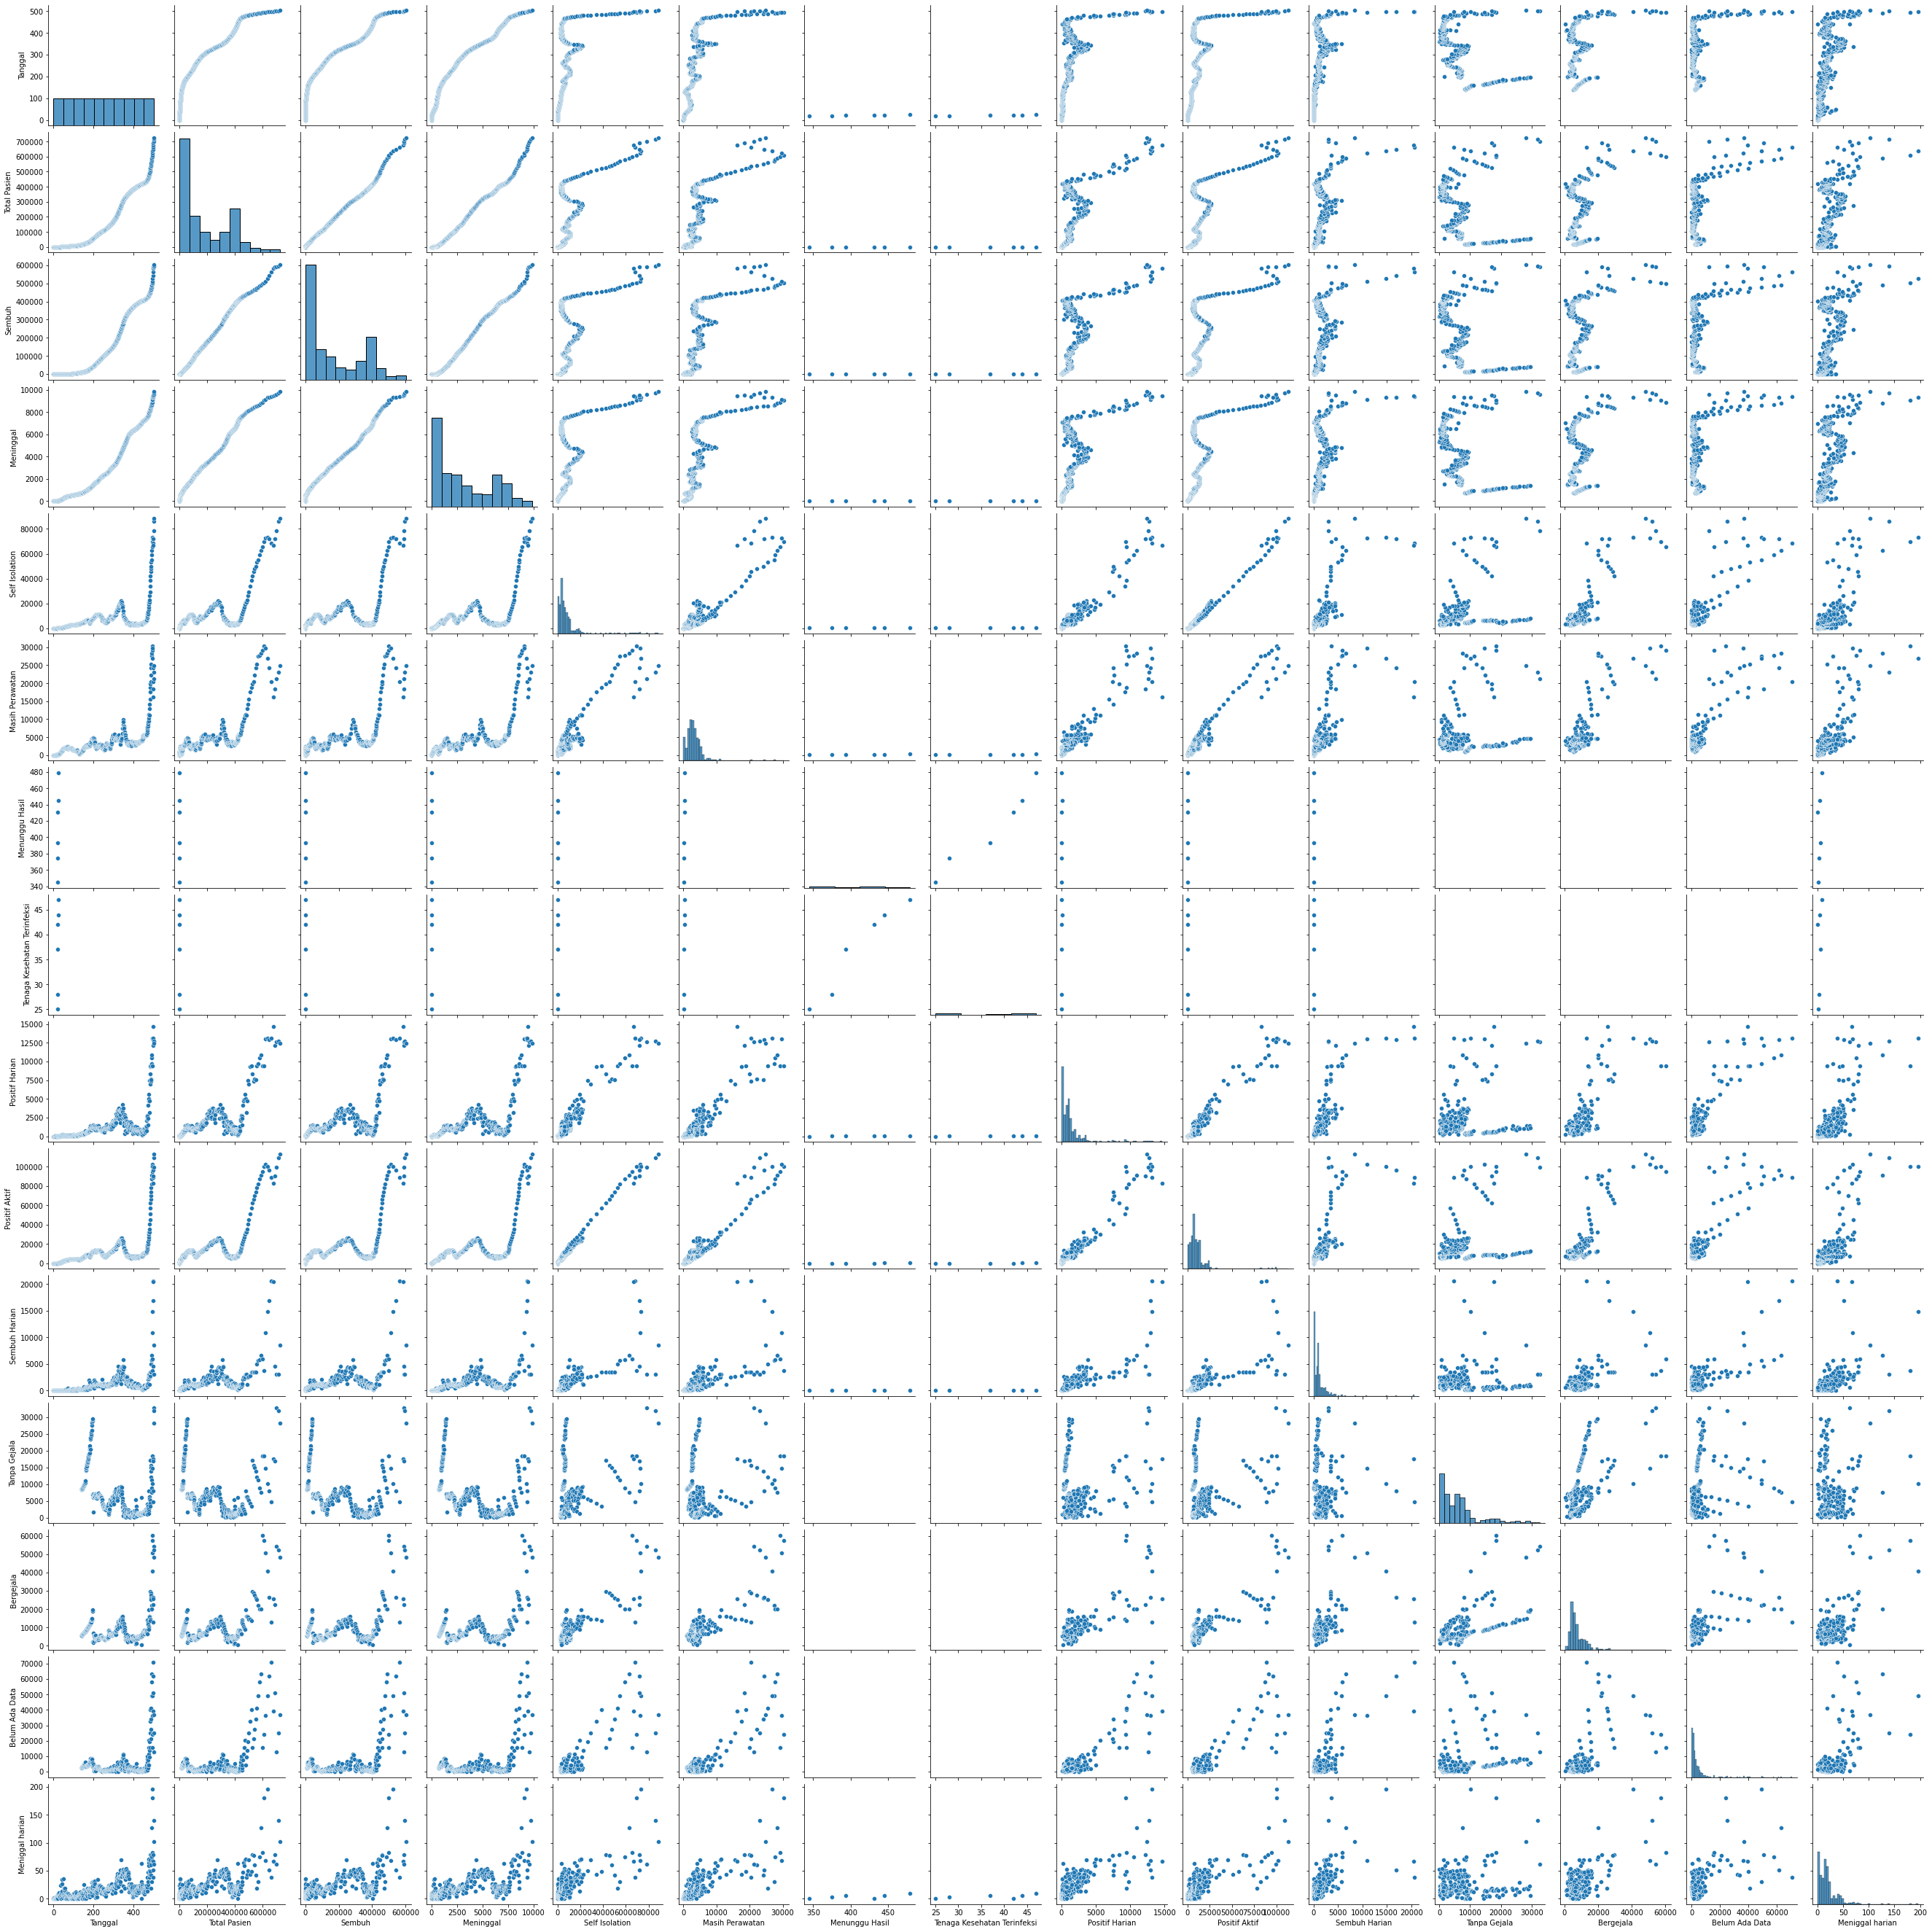

In [27]:
sns.pairplot(data)